# NVP (Net Present Value) 


En este cuaderno se transformara la formula NVP (Inglés) ó VPN (Español)

In [1]:
import numpy as np 
import numpy_financial as npf
import pandas as pd

npf.npv(rate, values):

**rate:** scalar 

The discount rate.

**values:** array_like, shape(M, )

The values of the time series of cash flows. The (fixed) time interval between cash flow “events” must be the same as that for which rate is given (i.e., if rate is per year, then precisely a year is understood to elapse between each cash flow event). By convention, investments or “deposits” are negative, income or “withdrawals” are positive; values must begin with the initial investment, thus values[0] will typically be negative.

**Out:** float 

The NPV of the input cash flow series values at the discount rate.

In [2]:
# Ejemplo 
# Suponga que se tienen flujos del 0-5
# Y se quiere saber el valor presente 
tasa = 0.03
Periodo0 = -1800000
Periodo1 = 800000
Periodo2 = 1010000
Periodo3 = 1220000
Periodo4 = 1010000
Periodo5 = 170000

# El periodo 0 ya esta en valor presente por tanto no es necesario 
# traerlo a valor presente 
# Entonces generamos un array con nuestros datos del 1 al 5 
Periodos =[Periodo0,Periodo1,Periodo2,Periodo3,Periodo4,Periodo5]


In [3]:
npf.npv(tasa,Periodos)

2089209.1335023136

# the Internal Rate of Return (IRR).



npf.irr(values):


**values:** array_like, shape(N, )

Input cash flows per time period. By convention, net “deposits” are negative and net “withdrawals” are positive. Thus, for example, at least the first element of values, which represents the initial investment, will typically be negative.

**Out:** float 

Internal Rate of Return for periodic input values.

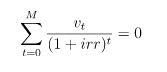

# Data Oil Company

In [4]:
data = pd.read_csv('Data_OilCompany.csv')

In [5]:
inv = 1800000
Price = 5
Cost = 0.80
fix = 40000
r = 0.03

In [6]:
data1 = (Price-Cost)*data-fix
data1['Year 0']=-inv
columna = data1.pop('Year 0')
data1.insert(0,'Year 0',columna)
data1['IRR'] = [npf.irr(np.array(data1.iloc[i])) for i in range(0,len(data1))]
data1['VPN'] = [npf.npv(r,np.array(data1.iloc[i,:-1])) for i in range(0,len(data1))]
data1

,Year 0,Year 1,Year 2,Year 3,Year 4,Year 5,IRR,VPN
0,-1800000,815649.2,1135869.8,1914272.6,801869.0,364539.8,0.508144,2.841295e+06
1,-1800000,1068149.0,1104243.8,-30793.6,799584.2,-40000.0,0.272260,9.256289e+05
2,-1800000,76449.2,1366416.2,305513.0,799806.8,232823.6,0.166964,7.532422e+05
3,-1800000,1193964.2,842491.4,1115365.4,799722.8,-40000.0,0.435260,1.850074e+06
4,-1800000,1208739.8,978789.8,1909207.4,802511.6,553397.0,0.591007,3.233719e+06
...,...,...,...,...,...,...,...,...
1995,-1800000,957756.2,1095969.8,444222.2,799189.4,216414.2,0.342774,1.466194e+06
1996,-1800000,869421.8,1056221.0,321313.4,802142.0,-40000.0,0.267406,1.011924e+06
1997,-1800000,1011163.4,887784.2,1980779.6,799160.0,-29193.4,0.503767,2.516089e+06
1998,-1800000,1014414.2,1002171.2,1557680.0,800420.0,481677.8,0.501834,2.681671e+06


- 1 What the probability that the IRR is over the Risk free rate?
- 2 What the probability that the IRR is over the 35%?
- 3 What the probability that the project value is over $2M?
- 4 What’s the probability that the IRR is between 10% and 20%?

In [7]:
# 1 
sum(data1['IRR']>r)/len(data1)

0.9885

In [8]:
# 2
sum(data1['IRR']>0.35)/len(data1)

0.5355

In [9]:
# 3
sum(data1['VPN']>2000000)/len(data1)

0.404

In [11]:
# 4
contador_mayor = sum(data1['IRR']>0.20)
contador_menor = sum(data1['IRR']<0.10)
1-abs(contador_mayor+contador_menor)/len(data1)

0.12

In [12]:
def VPN_IRR(data,Price,Cost,fix,inv):
    data1 = (Price-Cost)*data-fix
    data1['Year 0']=-inv
    columna = data1.pop('Year 0')
    data1.insert(0,'Year 0',columna)
    data1['IRR'] = [npf.irr(np.array(data1.iloc[i])) for i in range(0,len(data1))]
    data1['VPN'] = [npf.npv(r,np.array(data1.iloc[i,:-1])) for i in range(0,len(data1))]
    return data1